<a href="https://colab.research.google.com/github/sasumwen/tensorflow-developer-certificate_ZTM/blob/main/01_Neural_Network_Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with NN in TF

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.9.2'

### Create data to view and fit

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


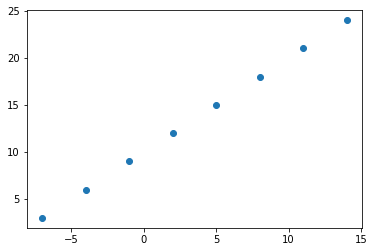

In [4]:
# create features 
X = np.array([-7.0, -4, -1, 2,5,8,11,14])

# createlabels
y = np.array([3.0,6,9,12,15,18,21,24])

# visualize it
plt.scatter(X,y)


## input and output shapes


In [5]:
# create a demo tensor for housing price prediction prob
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
# turn our np into tf
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## steps in modelling in TensorFlow

1. Creating a model - define the input and output layer, as well as the hidden layers of a deep learning model
2. COmpiling a model - define the loss function (in other words, the funciton which tells the model how wrong it is) and th eoptimizer ( tells our model how to improve its learning) and the evaluation metrics (what we can use to interprest the performance of our model)
3. Fitting a model - letting the model try to find patterns between X and y (features and labels)

In [7]:
#  set random see
tf.random.set_seed(84)

#1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2, compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is stochastic gradient descent
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 578ms/step - loss: 11.3754 - mae: 11.3754
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 11.2429 - mae: 11.2429
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1104 - mae: 11.1104
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9779 - mae: 10.9779
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.8454 - mae: 10.8454


In [8]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
# try to make pres using the model
model.predict([17])

1/1 [==============================] - 0s 108ms/step


array([[13.344376]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model

1. **Creating a Mocel** - here we might add more hiden layers, increate the number of hiden units( all called neurons) within each of the hiden layers, chage the activation function of each layer

2. **Compiling a model** - here we might change the optimixzation function or perhaps the learning rate of the opt function

3. **fitting a model** - here fit a model fo more epochs( leave it trian long) or give it more features tol learn from

In [10]:
# lets rebuild the model
# 1 create the model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2 compile
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3 fit

model.fit(tf.expand_dims(X, axis=-1,), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 484ms/step - loss: 16.8805 - mae: 16.8805
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 16.5993 - mae: 16.5993
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 16.3180 - mae: 16.3180
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 16.0368 - mae: 16.0368
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 15.7555 - mae: 15.7555
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 15.4743 - mae: 15.4743
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 15.1930 - mae: 15.1930
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 14.9149 - mae: 14.9149
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 14.7824 - mae: 14.7824
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 14.6499 - mae: 14.6499
Epoch 11/100
1/1 [==============================

In [11]:
# recall the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
# see if the prediction has imporved
model.predict([17])

1/1 [==============================] - 0s 96ms/step


array([[29.472445]], dtype=float32)

In [13]:
# let try again

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
   
    
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 841ms/step - loss: 14.3905 - mae: 14.3905
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.7663 - mae: 13.7663
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 13.1458 - mae: 13.1458
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5231 - mae: 12.5231
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 11.8935 - mae: 11.8935
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 11.2493 - mae: 11.2493
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 10.5914 - mae: 10.5914
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 9.9217 - mae: 9.9217
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 9.2212 - mae: 9.2212
Epoch 10/100
1/1 [==============================] - 0s 49ms/step - loss: 8.4940 - mae: 8.4940
Epoch 11/100
1/1 [==============================] - 0s

In [14]:
model.predict([17])

1/1 [==============================] - 0s 257ms/step


array([[31.810333]], dtype=float32)

## Evaluating a model

3 words to momeorized when evluuating, visualize visualize visualize
* the data - what does te data look like'
* the model -
* the training - how does it perform while it let
* the predictions of te model- how it lines up agains the grand truth

In [15]:
# MAke a bigger dataset

X= tf.range(-100,100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [16]:
y = X + 10

In [17]:
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [18]:
X = tf.cast(X, tf.float32)
X

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

In [19]:
y = tf.cast(y, tf.float32)
y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  90.,  94.,  98., 102., 106.], dtype=float32)>

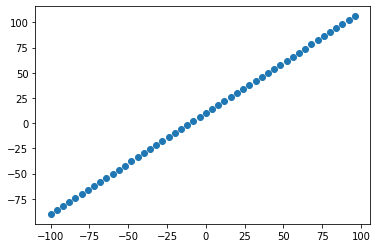

In [20]:
# visualize
plt.scatter(X, y)

### the 3 sets

* train
* validation
* test

In [21]:
# check the len of samples
len(X)

50

In [22]:
tf.random.set_seed(84)

# split the data into train and test
X_train = X[:40] # first 40 of the training sample (80%)
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the train and test data

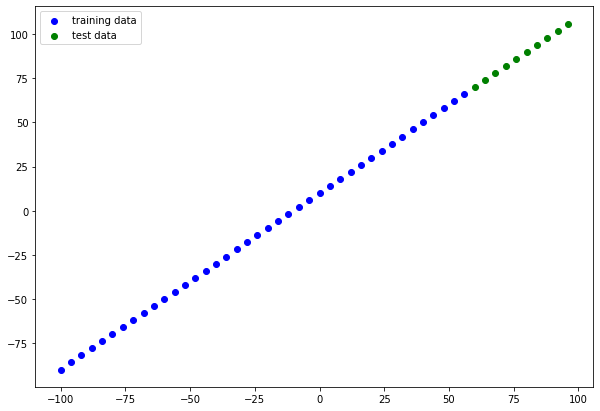

In [23]:
plt.figure(figsize=(10,7))
# plot trainin gdata int blue
plt.scatter(X_train, y_train, c ="b", label="training data")
# the test in gree
plt.scatter(X_test, y_test, c='g', label = "test data" )

# show a legend
plt.legend();

In [24]:
# building a model

# 1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics ='mae'
              )

# 3 fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 16.2584 - mae: 16.2584
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 8.9235 - mae: 8.9235
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 9.0494 - mae: 9.0494
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 16.6096 - mae: 16.6096
Epoch 5/100
2/2 [==============================] - 0s 17ms/step - loss: 8.1597 - mae: 8.1597
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 12.7613 - mae: 12.7613
Epoch 7/100
2/2 [==============================] - 0s 17ms/step - loss: 11.5393 - mae: 11.5393
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 11.0724 - mae: 11.0724
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 10.4268 - mae: 10.4268
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 9.3975 - mae: 9.3975
Epoch 11/100
2/2 [==============================] - 0s 10ms

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [26]:
from tensorflow.keras.utils import plot_model

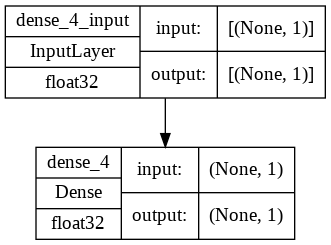

In [27]:
plot_model(model = model, show_shapes = True, show_dtype= True)

from tensorflow.python.ops.variables import local_variables
### Visualing model predictions

to do tis, it is adviced to plot them aainstht egrounf truth local_variables
oftern seen in the form of y_test or y_true versus y_pred

In [28]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 319ms/step


In [29]:
y_pred

array([[ 66.76198 ],
       [ 71.12507 ],
       [ 75.48816 ],
       [ 79.85125 ],
       [ 84.21434 ],
       [ 88.57743 ],
       [ 92.94052 ],
       [ 97.30361 ],
       [101.6667  ],
       [106.029785]], dtype=float32)

In [30]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [31]:
#  create a plotting funct
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions= y_pred):
  """
  Plots a taining dt test dt and compares t ground truth labels
  """
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c='b', label = "training_data")
  plt.scatter(test_data, test_labels, c='g', label = "test_data")
  plt.scatter(test_data, predictions, c='r', label = "predictions")
  plt.legend();
  return plot_predictions

  

<function __main__.plot_predictions(train_data=<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.], dtype=float32)>, train_labels=<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>, test_data=<tf.Tensor: shape=(10,), dtype=float32, numpy=array([60., 64., 68., 72., 76., 80., 84., 88., 92., 96.], dtype=float32)>, test_labels=<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86., 

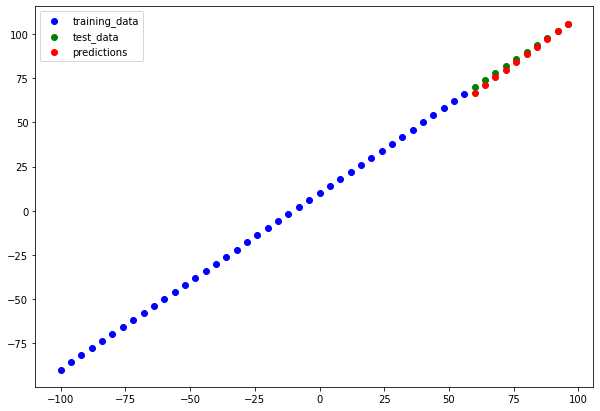

In [32]:
plot_predictions()

### Eva;uating model with regression evaluatin metrics

2 main metrics for regression
* mae
* mse

* Huber


In [33]:
#  evalueate model on test
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 607ms/step - loss: 1.6101 - mae: 1.6101


[1.610072374343872, 1.610072374343872]

In [34]:
#  calculate the mae
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))

In [35]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.6100724>

In [36]:
# calculate the mse
mse = tf.metrics.mean_squared_error(y_true= y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=3.6608195>

In [37]:
# functionlize for mae ad mse
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,
                                        y_pred =y_pred)
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_test,
                                       y_pred = y_pred)

### Running experiiments to improve our mofdel 

build .. fit... evaluate.. tweak ... fit .. evaluate.. tweak .. fit .. evaluate

1. get more data

2. make model larger using a more complex model... more layers or hidden unit

3. train fo rlonger

lets do 3 modeeling experiment
1. 'model_1' same as original 1 layer trained for 100 epochs
2. 'model_2' 2 layers 100 epochs
3. 'model_3' 2 layers 500 epochs

model_1

In [38]:
tf.random.set_seed(84)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae']
)

model_1.fit(tf.expand_dims(X_train, -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 16.2584 - mae: 16.2584
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 8.9235 - mae: 8.9235
Epoch 3/100
2/2 [==============================] - 0s 27ms/step - loss: 9.0494 - mae: 9.0494
Epoch 4/100
2/2 [==============================] - 0s 20ms/step - loss: 16.6096 - mae: 16.6096
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 8.1597 - mae: 8.1597
Epoch 6/100
2/2 [==============================] - 0s 27ms/step - loss: 12.7613 - mae: 12.7613
Epoch 7/100
2/2 [==============================] - 0s 18ms/step - loss: 11.5393 - mae: 11.5393
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 11.0724 - mae: 11.0724
Epoch 9/100
2/2 [==============================] - 0s 17ms/step - loss: 10.4268 - mae: 10.4268
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 9.3975 - mae: 9.3975
Epoch 11/100
2/2 [==============================] - 0s 23

1/1 [==============================] - 0s 242ms/step


<function __main__.plot_predictions(train_data=<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.], dtype=float32)>, train_labels=<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>, test_data=<tf.Tensor: shape=(10,), dtype=float32, numpy=array([60., 64., 68., 72., 76., 80., 84., 88., 92., 96.], dtype=float32)>, test_labels=<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86., 

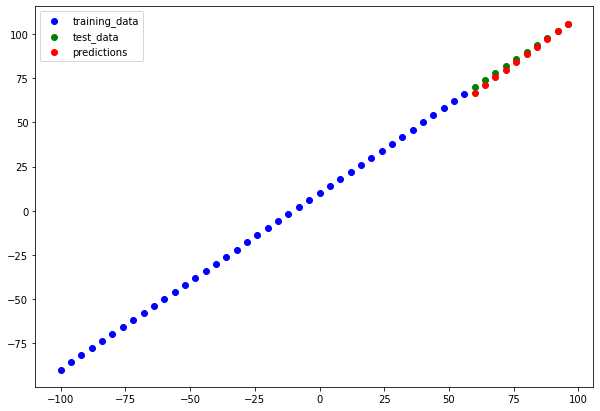

In [39]:
#  make a plot preds for model_1

y_preds_1 = tf.squeeze((model_1.predict(X_test)))
plot_predictions(predictions= y_preds_1)

In [40]:
#  create model_1 evaluationmetrics

mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.6100724>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.6608195>)

In [41]:
X

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

In [42]:
#  model_2
# 2 dense layers for 100 epochs
tf.random.set_seed(84)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae']
                )

model_2.fit(tf.expand_dims(X_train, -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 2s 13ms/step - loss: 38.3603 - mae: 38.3603
Epoch 2/100
2/2 [==============================] - 0s 17ms/step - loss: 18.5253 - mae: 18.5253
Epoch 3/100
2/2 [==============================] - 0s 25ms/step - loss: 22.8725 - mae: 22.8725
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 26.3367 - mae: 26.3367
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 12.6861 - mae: 12.6861
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 29.2457 - mae: 29.2457
Epoch 7/100
2/2 [==============================] - 0s 44ms/step - loss: 20.9605 - mae: 20.9605
Epoch 8/100
2/2 [==============================] - 0s 25ms/step - loss: 12.8847 - mae: 12.8847
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 10.3563 - mae: 10.3563
Epoch 10/100
2/2 [==============================] - 0s 24ms/step - loss: 13.3828 - mae: 13.3828
Epoch 11/100
2/2 [==============================]

In [43]:
y_test.shape

TensorShape([10])

1/1 [==============================] - 0s 357ms/step


<function __main__.plot_predictions(train_data=<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.], dtype=float32)>, train_labels=<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>, test_data=<tf.Tensor: shape=(10,), dtype=float32, numpy=array([60., 64., 68., 72., 76., 80., 84., 88., 92., 96.], dtype=float32)>, test_labels=<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86., 

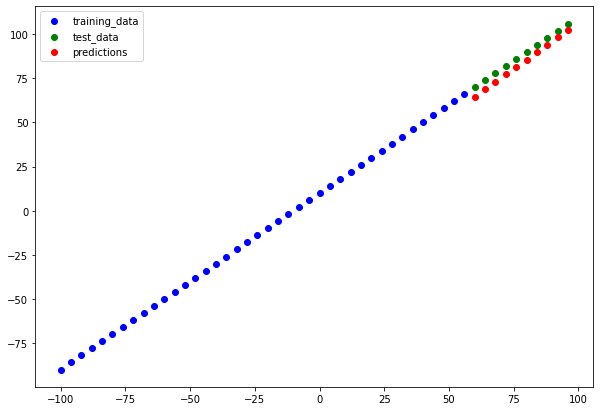

In [44]:
y_preds_2 = tf.squeeze(model_2.predict(X_test))
plot_predictions(predictions = y_preds_2)

In [45]:
y_preds_2

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 64.614426,  68.815125,  73.015854,  77.216545,  81.41726 ,
        85.617966,  89.818665,  94.01938 ,  98.22008 , 102.42078 ],
      dtype=float32)>

In [46]:
#  cal model_2 evaluatiun
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=4.482393>,
 <tf.Tensor: shape=(), dtype=float32, numpy=20.424183>)

In [47]:
#  model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

model_3.fit(tf.expand_dims(X_train, -1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 7ms/step - loss: 38.9085
Epoch 2/500
2/2 [==============================] - 0s 13ms/step - loss: 36.8250
Epoch 3/500
2/2 [==============================] - 0s 12ms/step - loss: 34.7557
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 32.7614
Epoch 5/500
2/2 [==============================] - 0s 14ms/step - loss: 30.6674
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 28.6422
Epoch 7/500
2/2 [==============================] - 0s 14ms/step - loss: 26.6132
Epoch 8/500
2/2 [==============================] - 0s 11ms/step - loss: 24.5892
Epoch 9/500
2/2 [==============================] - 0s 13ms/step - loss: 22.5376
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 20.5427
Epoch 11/500
2/2 [==============================] - 0s 15ms/step - loss: 18.5466
Epoch 12/500
2/2 [==============================] - 0s 18ms/step - loss: 16.6299
Epoch 13/500
2/2 [======================

1/1 [==============================] - 0s 85ms/step


<function __main__.plot_predictions(train_data=<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.], dtype=float32)>, train_labels=<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>, test_data=<tf.Tensor: shape=(10,), dtype=float32, numpy=array([60., 64., 68., 72., 76., 80., 84., 88., 92., 96.], dtype=float32)>, test_labels=<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86., 

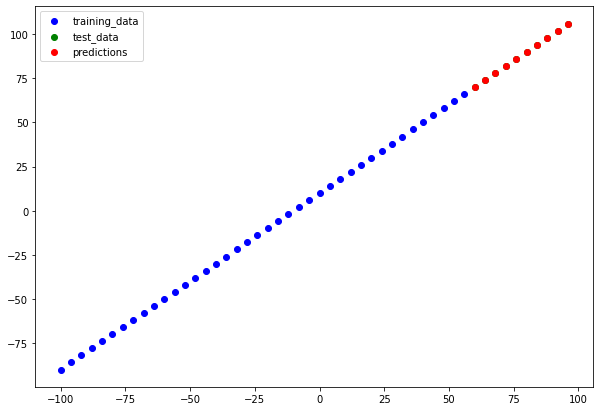

In [48]:
y_preds_3 = tf.squeeze(model_3.predict(X_test))
plot_predictions(predictions=y_preds_3)

In [49]:
# evaluate model_3
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.013024139>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.00016990028>)

### Comparing the results of out exprment



In [50]:
# lets use pd to conpare

import pandas as pd
model_results = [
    ["model_1", mae_1.numpy(), mse_1.numpy()],
    ['model_2', mae_2.numpy(), mse_2.numpy()],
    ["model_3", mae_3.numpy(), mse_3.numpy()]
                ]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])

In [51]:
all_results

,model,mae,mse
0,model_1,1.610072,3.660820
1,model_2,4.482393,20.424183
2,model_3,0.013024,0.000170


In [52]:
# model 3 was the best
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               200       
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


### tracking your experiment

there are tools to help when tracking experiment espcially when doing lots pf experiment

* TensorBoard .. a component of the tf lib to track modelling experiment

* Weights & Biases .. a tool for tracking all ikinds of experiment and it is good as it plugs straigth into tensorboard



### saving and loading a model

there are 2 main format to save models to
1. the savedmodel format
2. the hdf5

In [53]:
# using the SaveModel format
model_3.save("best_model")

### loading and reevaluating a saved model

In [54]:
# loading
loaded_saved = tf.keras.models.load_model("/content/best_model")

In [55]:
loaded_saved.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               200       
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


### Download a model from google colab

1. can just download form the file tab
2. another was is to use code
3. save it to google drive by mounting and copying it there

In [56]:
# download from dolab with code
from google.colab import files
files.download("/content/best_model")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# save from colab to drive
# !cp/content/best_model / ?cotent/location in drive